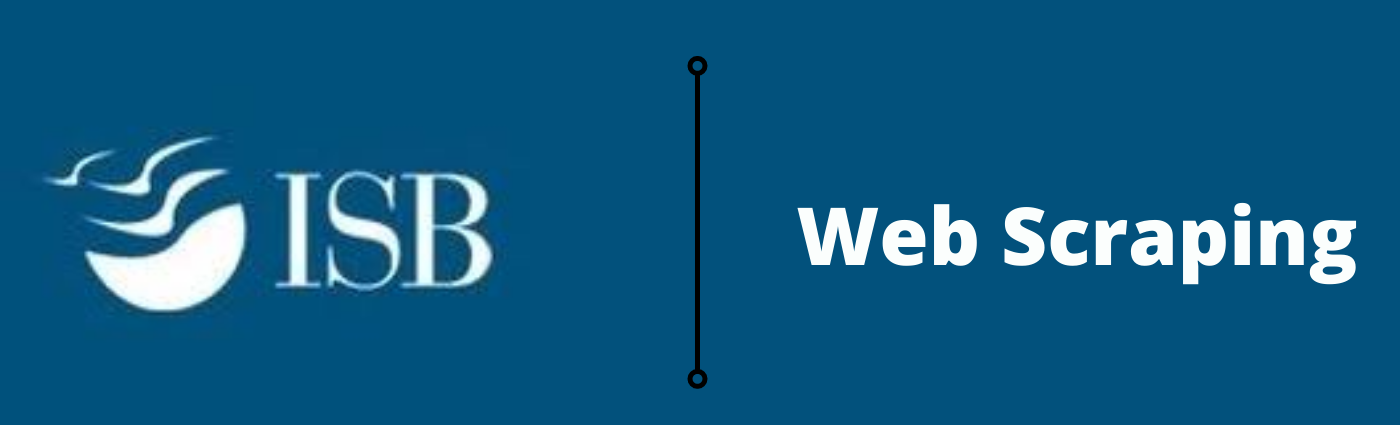

In [4]:
import PIL
from PIL import Image
img=Image.open('download (7).png')
img

# Project for Indian Institute Of Business.

## Problem Statement

Scrape all job postings by area from the links given in the file ‘link_by_areas.csv’. For every link, loop through all the job postings by page, collecting all the information for a given posting.

Create an output CSV file with job title, company, experience, salary, location, description, tags associated, function area, posting date, scraping date.

## Solution

The task at hand is to build a Python Auto Scraper tool that will scrape data from Naukri job site and save the output as a CSV file which can be used for further analysis.

In order to accomplish this task. I will be using Python to scrape the required data from the job search site-Naukri.

To begin with, the necessary libraries needs to be imported.

WebDriver- drives a browser natively, as a user would, either locally or on a remote machine using the Selenium server, marks a leap forward in terms of browser automation.

Selenium WebDriver- refers to both the language bindings and the implementations of the individual browser controlling code. This is commonly referred to as just WebDriver.

Beautiful Soup- is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

Pandas- is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. Used for dataframe manupulations.

In [1]:
#importing the libraries

from selenium import webdriver
import chromedriver_binary
from bs4 import BeautifulSoup
import time
import pandas as pd

In [2]:
#loading the link_by_areas.csv file
joblinks=pd.read_csv(r'C:\Users\yugan\Downloads\link_by_areas.csv')
joblinks

,type,link
0,Accounting Jobs,https://www.naukri.com/accounting-jobs?xt=cats...
1,Interior Design Jobs,https://www.naukri.com/interior-design-jobs?xt...
2,Bank Jobs,https://www.naukri.com/bank-jobs?xt=catsrch&qf...
3,Content Writing Jobs,https://www.naukri.com/content-writing-jobs?xt...
4,Consultant Jobs,https://www.naukri.com/consultant-jobs?xt=cats...
5,Engineering Jobs,https://www.naukri.com/engineering-jobs?xt=cat...
6,Export Import Jobs,https://www.naukri.com/export-import-jobs?xt=c...
7,Merchandiser Jobs,https://www.naukri.com/merchandiser-jobs?xt=ca...
8,Security Jobs,https://www.naukri.com/security-jobs?xt=catsrc...
9,HR Jobs,https://www.naukri.com/hr-jobs?xt=catsrch&qf[]=12


## The URL STRUCTURE

In order to scrape data from one page to the other, the urls need to be created in such a way that it will automatically adjust to move move from one page to the other.

When we look closely at the urls, we can see that all theurls have the domain https://www.naukri.com/ followed by the job type, then the page number and a question mark as shown below. We will need to find a way to make the page number generic in order to be able to navigate through different pages automatically.

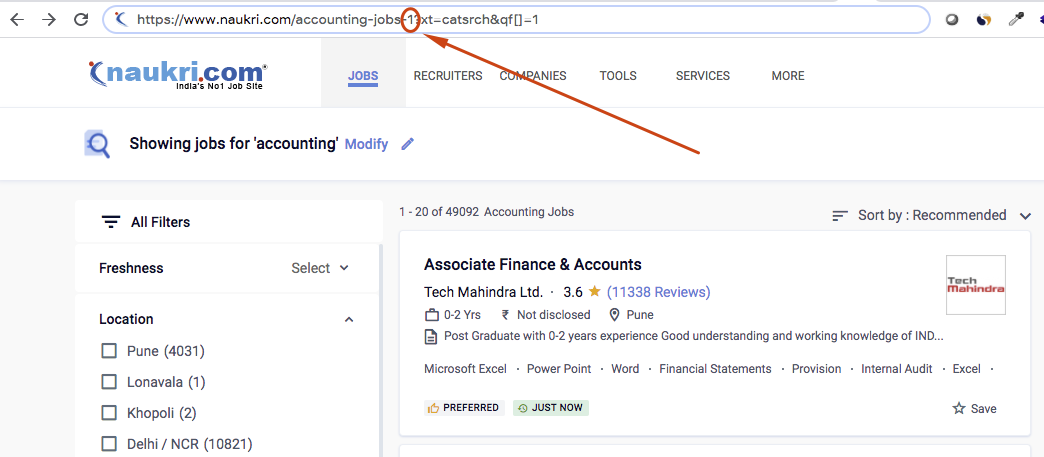

In [3]:
import PIL
from PIL import Image
img=Image.open(r'C:\Users\yugan\Downloads\download (5).png')
img

## Let's first convert our urls to a list

In [4]:
urls=joblinks['link'].tolist()

In [5]:
urls

['https://www.naukri.com/accounting-jobs?xt=catsrch&qf[]=1',
 'https://www.naukri.com/interior-design-jobs?xt=catsrch&qf[]=2',
 'https://www.naukri.com/bank-jobs?xt=catsrch&qf[]=6',
 'https://www.naukri.com/content-writing-jobs?xt=catsrch&qf[]=5',
 'https://www.naukri.com/consultant-jobs?xt=catsrch&qf[]=9',
 'https://www.naukri.com/engineering-jobs?xt=catsrch&qf[]=21',
 'https://www.naukri.com/export-import-jobs?xt=catsrch&qf[]=10',
 'https://www.naukri.com/merchandiser-jobs?xt=catsrch&qf[]=10',
 'https://www.naukri.com/security-jobs?xt=catsrch&qf[]=45',
 'https://www.naukri.com/hr-jobs?xt=catsrch&qf[]=12',
 'https://www.naukri.com/hotel-jobs?xt=catsrch&qf[]=4',
 'https://www.naukri.com/application-programming-jobs?xt=catsrch&qf[]=24.01',
 'https://www.naukri.com/client-server-jobs?xt=catsrch&qf[]=24.02',
 'https://www.naukri.com/dba-jobs?xt=catsrch&qf[]=24.03',
 'https://www.naukri.com/ecommerce-jobs?xt=catsrch&qf[]=24.12',
 'https://www.naukri.com/erp-jobs?xt=catsrch&qf[]=24.04',
 'h

#### In order to make the urls generic. We will need use a library called Yarl(Yet another URL library). All url parts: scheme, user, password, host, port, path, query and fragment are accessible by yarl properties.

#### We will use yarl to access different parts of the variuos urls.

In [6]:
#in order to use yarl, we need to first install the yarl library
!pip install yarl

### Extracting the job type part of url

In [7]:
from yarl import URL  #importing the yarl library 

n = [] #an empty list that will contain the job type of the url
for i in urls:
    n.append(URL(i).path) #getting the job type part of the url using yarl property: path

In [8]:
n

['/accounting-jobs',
 '/interior-design-jobs',
 '/bank-jobs',
 '/content-writing-jobs',
 '/consultant-jobs',
 '/engineering-jobs',
 '/export-import-jobs',
 '/merchandiser-jobs',
 '/security-jobs',
 '/hr-jobs',
 '/hotel-jobs',
 '/application-programming-jobs',
 '/client-server-jobs',
 '/dba-jobs',
 '/ecommerce-jobs',
 '/erp-jobs',
 '/vlsi-jobs',
 '/mainframe-jobs',
 '/middleware-jobs',
 '/mobile-jobs',
 '/network-administrator-jobs',
 '/information-technology-jobs',
 '/testing-jobs',
 '/system-programming-jobs',
 '/edp-jobs',
 '/telecom-software-jobs',
 '/telecom-jobs',
 '/bpo-jobs',
 '/legal-jobs',
 '/marketing-jobs',
 '/packaging-jobs',
 '/pharma-jobs',
 '/maintenance-jobs',
 '/logistics-jobs',
 '/sales-jobs',
 '/secretary-jobs',
 '/corporate-planning-jobs',
 '/site-engineering-jobs',
 '/film-jobs',
 '/teaching-jobs',
 '/airline-jobs',
 '/graphic-designer-jobs',
 '/shipping-jobs',
 '/analytics-jobs',
 '/business-intelligence-jobs']

### Extracting rest of the url after job type  and ?

In [9]:
m = [] #an empty list that will contain the rest of the url after the job part
for i in urls:
    m.append(URL(i).query_string)  #getting the rest of the url using yarl property: query_string

In [10]:
m

['xt=catsrch&qf[]=1',
 'xt=catsrch&qf[]=2',
 'xt=catsrch&qf[]=6',
 'xt=catsrch&qf[]=5',
 'xt=catsrch&qf[]=9',
 'xt=catsrch&qf[]=21',
 'xt=catsrch&qf[]=10',
 'xt=catsrch&qf[]=10',
 'xt=catsrch&qf[]=45',
 'xt=catsrch&qf[]=12',
 'xt=catsrch&qf[]=4',
 'xt=catsrch&qf[]=24.01',
 'xt=catsrch&qf[]=24.02',
 'xt=catsrch&qf[]=24.03',
 'xt=catsrch&qf[]=24.12',
 'xt=catsrch&qf[]=24.04',
 'xt=catsrch&qf[]=24.05',
 'xt=catsrch&qf[]=24.13',
 'xt=catsrch&qf[]=24.15',
 'xt=catsrch&qf[]=24.14',
 'xt=catsrch&qf[]=24.06',
 'xt=catsrch&qf[]=24',
 'xt=catsrch&qf[]=24.08',
 'xt=catsrch&qf[]=24.09',
 'xt=catsrch&qf[]=24.11',
 'xt=catsrch&qf[]=24.10',
 'xt=catsrch&qf[]=37',
 'xt=catsrch&qf[]=8',
 'xt=catsrch&qf[]=13',
 'xt=catsrch&qf[]=15',
 'xt=catsrch&qf[]=18',
 'xt=catsrch&qf[]=16',
 'xt=catsrch&qf[]=19',
 'xt=catsrch&qf[]=14',
 'xt=catsrch&qf[]=22',
 'xt=catsrch&qf[]=11',
 'xt=catsrch&qf[]=7',
 'xt=catsrch&qf[]=20',
 'xt=catsrch&qf[]=43',
 'xt=catsrch&qf[]=36',
 'xt=catsrch&qf[]=44',
 'xt=catsrch&qf[]=3',
 

### Now that we have been able to extract the variuos parts of the urls, we will sticth them together but this time we will add hyphen,a placeholder,& question mark - {}? after the job type part of the url.

In [11]:
gen_urls= []
for i in range(len(n)):
    
    url = 'https://www.naukri.com/'+n[i]+'-{}?'+m[i] #adding the domain of the url, the job part,hyphen,a placeholder,& question mark  - {}?, as well as the rest of the url together
    gen_urls.append(url) #appending our generic url into a list

In [12]:
gen_urls

['https://www.naukri.com//accounting-jobs-{}?xt=catsrch&qf[]=1',
 'https://www.naukri.com//interior-design-jobs-{}?xt=catsrch&qf[]=2',
 'https://www.naukri.com//bank-jobs-{}?xt=catsrch&qf[]=6',
 'https://www.naukri.com//content-writing-jobs-{}?xt=catsrch&qf[]=5',
 'https://www.naukri.com//consultant-jobs-{}?xt=catsrch&qf[]=9',
 'https://www.naukri.com//engineering-jobs-{}?xt=catsrch&qf[]=21',
 'https://www.naukri.com//export-import-jobs-{}?xt=catsrch&qf[]=10',
 'https://www.naukri.com//merchandiser-jobs-{}?xt=catsrch&qf[]=10',
 'https://www.naukri.com//security-jobs-{}?xt=catsrch&qf[]=45',
 'https://www.naukri.com//hr-jobs-{}?xt=catsrch&qf[]=12',
 'https://www.naukri.com//hotel-jobs-{}?xt=catsrch&qf[]=4',
 'https://www.naukri.com//application-programming-jobs-{}?xt=catsrch&qf[]=24.01',
 'https://www.naukri.com//client-server-jobs-{}?xt=catsrch&qf[]=24.02',
 'https://www.naukri.com//dba-jobs-{}?xt=catsrch&qf[]=24.03',
 'https://www.naukri.com//ecommerce-jobs-{}?xt=catsrch&qf[]=24.12',
 

In [13]:
for i in gen_urls:
    print(i)

https://www.naukri.com//accounting-jobs-{}?xt=catsrch&qf[]=1
https://www.naukri.com//interior-design-jobs-{}?xt=catsrch&qf[]=2
https://www.naukri.com//bank-jobs-{}?xt=catsrch&qf[]=6
https://www.naukri.com//content-writing-jobs-{}?xt=catsrch&qf[]=5
https://www.naukri.com//consultant-jobs-{}?xt=catsrch&qf[]=9
https://www.naukri.com//engineering-jobs-{}?xt=catsrch&qf[]=21
https://www.naukri.com//export-import-jobs-{}?xt=catsrch&qf[]=10
https://www.naukri.com//merchandiser-jobs-{}?xt=catsrch&qf[]=10
https://www.naukri.com//security-jobs-{}?xt=catsrch&qf[]=45
https://www.naukri.com//hr-jobs-{}?xt=catsrch&qf[]=12
https://www.naukri.com//hotel-jobs-{}?xt=catsrch&qf[]=4
https://www.naukri.com//application-programming-jobs-{}?xt=catsrch&qf[]=24.01
https://www.naukri.com//client-server-jobs-{}?xt=catsrch&qf[]=24.02
https://www.naukri.com//dba-jobs-{}?xt=catsrch&qf[]=24.03
https://www.naukri.com//ecommerce-jobs-{}?xt=catsrch&qf[]=24.12
https://www.naukri.com//erp-jobs-{}?xt=catsrch&qf[]=24.04
htt

#### we have our urls with a placeholder {} where we can simply by adding the page numbers navigate to different pages as we scrape our data.

### Confirming below to see if we still have same number of urls as given in original dataset.

In [14]:
joblinks.shape

(45, 2)

In [15]:
len(gen_urls)

45

# Scraping Data From Naukri.Com

In order to scrape the required data from naukri.com, we will follow a simple two step process:

Define a dataframe which will contain our data
Create a generic python code which will help to extract the data as required.

In [16]:
for page in range(1,3):
    print(page)

1
2


In [17]:
gen_urls[0:3]

['https://www.naukri.com//accounting-jobs-{}?xt=catsrch&qf[]=1',
 'https://www.naukri.com//interior-design-jobs-{}?xt=catsrch&qf[]=2',
 'https://www.naukri.com//bank-jobs-{}?xt=catsrch&qf[]=6']

### To get url by formatting the page no. in gen_url

In [18]:
for page in range(1,3):
    for urll in gen_urls[0:2]:
        url=urll.format(page)
        driver=webdriver.Chrome()           #automatically opens up the chrome
        driver.get(url)
        print(url)
        driver.close()                      #after 1 page closes d browser and re-opens up d next page
        

https://www.naukri.com//accounting-jobs-1?xt=catsrch&qf[]=1
https://www.naukri.com//interior-design-jobs-1?xt=catsrch&qf[]=2
https://www.naukri.com//accounting-jobs-2?xt=catsrch&qf[]=1
https://www.naukri.com//interior-design-jobs-2?xt=catsrch&qf[]=2


In [19]:
for page in range(1,5):
    for urll in gen_urls[0:1]:
        url=urll.format(page)
        driver=webdriver.Chrome()           #automatically opens up the chrome
        driver.get(url)
        time.sleep(5)                       #so that websites don't consider us robots and does n't block us
        print(url)
        
        driver.close()                      #after 1 page closes d browser and re-opens up d next page
        

https://www.naukri.com//accounting-jobs-1?xt=catsrch&qf[]=1
https://www.naukri.com//accounting-jobs-2?xt=catsrch&qf[]=1
https://www.naukri.com//accounting-jobs-3?xt=catsrch&qf[]=1
https://www.naukri.com//accounting-jobs-4?xt=catsrch&qf[]=1


### Create a dataframe to contain our scraped data

In [29]:
df = pd.DataFrame(columns=['Job_Title','Company','Experience','Scraping_Date','Salary','Location','Description','Tags_Associated','Posting_Date'])

In [31]:
 for page in range(1,2):
    for urll in gen_urls[0:1]:
        url=urll.format(page)
        driver=webdriver.Chrome()           #automatically opens up the chrome
        driver.get(url)
        time.sleep(5)
        soup=BeautifulSoup(driver.page_source,'html5lib')
        
        driver.close()                      #after 1 page closes d browser and re-opens up d next page
        
        results=soup.find(class_='list')
        job_elems=results.find_all('article',class_='jobTuple bgWhite br4 mb-8')
        
        for job_elem in job_elems:
            
            
                 #function  area
                #func_results=soup.find('p',class_='jdRightItemValue')
                #if func_results is None:
                 #   func_results='Not Available'
                  #  continue
                #else:
                 #   func_area=func_results.text
                  #  print(func_area)
                
            #job title
                Job_Title=job_elem.find('a',class_='title fw500 ellipsis')
                print(Job_Title.text)
                
            
            #Company
                Company=job_elem.find('a',class_='subTitle ellipsis fleft')
                print(Company.text) 
            
            
            # Experience
                #Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
                Exp_span = job_elem.find('span',class_='ellipsis fleft fs12 lh16 expwdth')
                if Exp_span is None:
                    continue
                
                else:
                    print(Exp_span.text)
            
            
            #Date Scraped
                from datetime import date
                today=date.today()
                date_today=today.strftime('%d/%m/%Y')
                print(date_today)
                
            #Salary
                Sal=job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
                
                if Sal is None:
                    continue
                
                else:
                    print(Sal.text)
                    
               
            #Location
                location=job_elem.find('span',class_='ellipsis fleft fs12 lh16 locWdth')
                
                if location is None:
                    continue
                
                else:
                    print(location.text)
                    
            #Description
                desc=job_elem.find(class_="job-description fs12 grey-text")
                print(desc.text)
                
              #tags
                
                tags=job_elem.find('ul',class_="tags has-description")
              
                
                if tags is None:
                    continue
                else:
                    print(tags.text)
                
              #Date of posting job
                date=job_elem.find('span',class_="fleft fw500")
                
                if date is None:
                    continue
                else:
                    print(date.text)
                    
                #filling the data in dataframe
                df=df.append({'Job_Title':Job_Title.text,'Experience':Exp_span.text,'Company':Company.text,'Scraping_Date':date_today, 'Salary':Sal.text,'Location':location.text,'Description':desc.text,'Tags_Associated':tags.text,'Posting_Date':date.text},ignore_index = True)
                
                
            
            
            

Associate/ Senior Associate  in UK Accounts/ Thane
Anderson Business Solutions
1-4 Yrs
04/12/2022
2,25,000 - 4,50,000 PA.
Thane, Navi Mumbai, Mumbai (All Areas)(Ghodbunder Road)
 BCom graduates / Accounting Technician / ACCA / pursuing ACCA having experience of mini...
AccountingManagement AccountingMISVATAccountantBank ReconciliationAccounts executiveAccounts and finance
2 Days Ago
Account Executive
Paytm
0-1 Yrs
04/12/2022
Not disclosed
Kolkata
 year degree preferred in Business or related field 5+ years experience and success in a...
SalesTime managementSAASDatabaseManager TechnologyManagementAccounts ExecutiveTeam building
2 Days Ago
Account Executive -Sports
Paytm
0-2 Yrs
04/12/2022
Not disclosed
Mumbai
 Should have excellent presentation, oral and written communication skillsWithin the Spo...
TicketingProject managementAccounts ExecutiveMS OfficeServicingClient management
2 Days Ago
Junior or Senior Accounts  Executive
Synmac Consultants
0-5 Yrs
04/12/2022
1,00,000 - 5,00,000 PA.

In [21]:
df = pd.DataFrame(columns=['Job_Title','Company','Experience','Scraping_Date','Salary','Location','Description','Tags_Associated','Posting_Date'])

In [27]:
df=df.append({'Job_Title':Job_Title.text,'Experience':Exp_span.text,'Company':Company.text,'Scraping_Date':date_today, 'Salary':Sal.text,'Location':location.text,'Description':desc.text,'Tags_Associated':tags.text,'Posting_Date':date.text},ignore_index = True)

### Let's observe the data we have scraped and saved in our pandas dataframe

In [32]:
df

,Job_Title,Company,Experience,Scraping_Date,Salary,Location,Description,Tags_Associated,Posting_Date
0,Associate/ Senior Associate in UK Accounts/ T...,Anderson Business Solutions,1-4 Yrs,04/12/2022,"2,25,000 - 4,50,000 PA.","Thane, Navi Mumbai, Mumbai (All Areas)(Ghodbun...",BCom graduates / Accounting Technician / ACCA...,AccountingManagement AccountingMISVATAccountan...,2 Days Ago
1,Account Executive,Paytm,0-1 Yrs,04/12/2022,Not disclosed,Kolkata,year degree preferred in Business or related ...,SalesTime managementSAASDatabaseManager Techno...,2 Days Ago
2,Account Executive -Sports,Paytm,0-2 Yrs,04/12/2022,Not disclosed,Mumbai,"Should have excellent presentation, oral and ...",TicketingProject managementAccounts ExecutiveM...,2 Days Ago
3,Junior or Senior Accounts Executive,Synmac Consultants,0-5 Yrs,04/12/2022,"1,00,000 - 5,00,000 PA.","New Delhi, Chennai, Bangalore/Bengaluru",Freshers will be taken as trainee and stipend...,Statutory AuditTax AuditIncome TaxProfessional...,Today
4,Chartered Accountant Fresher,Shahi,0-2 Yrs,04/12/2022,Not disclosed,Faridabad,Roles and Responsibilities Debtors ControlRev...,chartered accountantCa,2 Days Ago
5,Chartered Accountant,Muthoot Finance,0-5 Yrs,04/12/2022,"9,00,000 PA.",Mumbai,QUALIFIED CHARTERED ACCOUNTANT The Muthoot Gr...,qualified chartered accountantstatutory report...,2 Days Ago
6,Finance Associate (Account Receivable),Marriott,0-3 Yrs,04/12/2022,Not disclosed,Amritsar,"Check figures, postings, and documents for co...",SupervisorPayrollFinancial AssociateFinancial ...,2 Days Ago
7,Account Executive - Sales,500apps,0-3 Yrs,04/12/2022,Not disclosed,Hyderabad/Secunderabad,Must Have: International Selling Experience w...,writtenInternational Sellingverbal communicati...,1 Day Ago
8,Deputy Manager-Acquisition (Current Account),IDFC FIRST Bank,0-4 Yrs,04/12/2022,Not disclosed,Thrissur/Trichur,Part Time / Full Time - Full Time Graduate - ...,business acquisitionBfsiBranch bankingArea sal...,2 Days Ago
9,Hiring Cost Accountants - Pochampalli Location...,Ola Electric,0-2 Yrs,04/12/2022,"2,50,000 - 3,00,000 PA.","Pochampalli, Krishnagiri",Job Location: PochampalliRoles and Responsibi...,AccountingICWAcost accountingCMA,Today


### Saving the scraped data into a csv file

In [33]:
df.to_csv('NaukriJobScraped.csv')